# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

## TODO
1. some trajectories may not start on the boundaries. Remove those
2. some local transformations may fail. Check the validity of the first row after transformation

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

# dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\TTI-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
sceneId = 22
date = "2022-12-22"
fps=5
minYDisplacement = 6.5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [6]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed',
        fps=fps
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [7]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,235,18001,22,9.0,8.845965,4.485159,1.263405,0.572902,-0.230607,0.419307
1,18,240,18001,22,9.0,8.590706,4.402693,1.276295,0.412328,-0.064447,0.802866
2,18,245,18001,22,9.0,8.330737,4.355752,1.299848,0.234706,-0.117765,0.888114
3,18,250,18001,22,9.0,8.061950,4.335745,1.343936,0.100036,-0.220440,0.673346
4,18,255,18001,22,9.0,7.781109,4.330627,1.404200,0.025591,-0.301324,0.372225


In [8]:
# print(pedDf["uniqueTrackId"].unique())

In [9]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,1889.000000,1889.000000,1889.000000,1889.0,1889.0,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000
mean,22.781366,17674.205929,23091.046056,22.0,9.0,1.699804,0.523120,0.011575,0.185709,0.031454,-0.035970,1.342359,3.368856,3.299329
std,3.731785,9666.829949,3834.693705,0.0,0.0,4.379595,2.877905,0.973017,1.029172,0.420670,0.363037,0.487562,3.235228,2.700359
min,18.000000,151.000000,18001.000000,22.0,9.0,-6.918586,-4.668876,-2.318874,-2.266289,-2.570607,-1.982749,0.014320,0.000000,0.000000
25%,20.000000,11694.000000,20256.000000,22.0,9.0,-1.876306,-2.200573,-0.886524,-0.815767,-0.181372,-0.216504,1.192692,0.666495,0.986646
50%,22.000000,17927.000000,22014.000000,22.0,9.0,1.587515,0.920470,0.060641,0.255410,0.029314,-0.040293,1.427889,2.444808,2.453055
75%,26.000000,25477.000000,26116.000000,22.0,9.0,5.080854,3.260796,0.808050,1.094024,0.236231,0.125832,1.637245,4.999532,5.526633
max,29.000000,31956.000000,29600.000000,22.0,9.0,9.825033,4.672356,2.192736,3.482821,2.001175,1.923488,3.516988,14.899091,9.154517


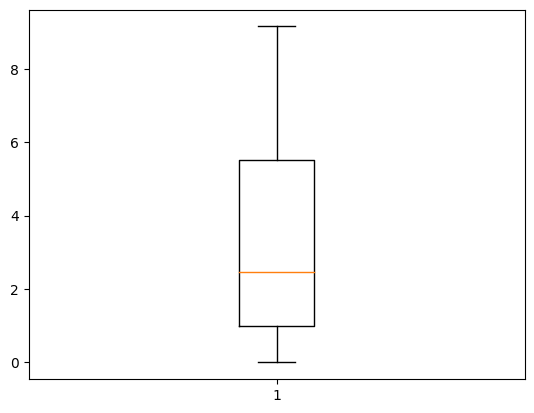

{'whiskers': [<matplotlib.lines.Line2D at 0x1b898a387c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b898a38d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b898a38520>],
 'medians': [<matplotlib.lines.Line2D at 0x1b898a48280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b898a48520>],
 'means': []}

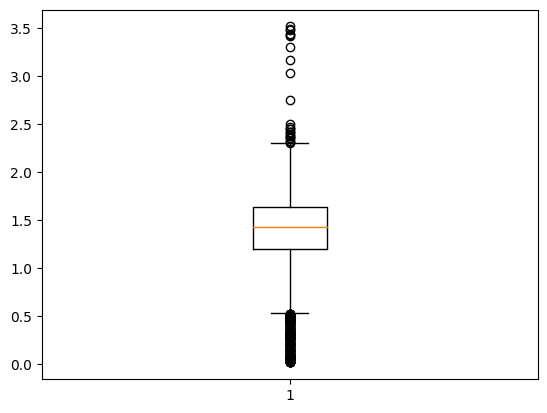

In [10]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [11]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
# outliers.index

In [12]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
# outliers

In [13]:
# outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [14]:
# ped19019 = pedDf[pedDf["uniqueTrackId"] == 19019]
# firstRow = ped19019.iloc[0]
# firstRow

In [15]:
# dX, dY = transformer.translateOneToLocalSource(ped19019)
# print(list(zip(dX, dY)))

In [16]:
# ped19019.tail()

In [17]:
# print(len(outliers), 'vs', len(pedDf["uniqueTrackId"].unique()))

In [18]:
# outliers = cleaner.getOutliersByXDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [19]:
# cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)
# cleanPedDf2 = cleaner.cleanBySpeed(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

using min Y displacement (6.5)


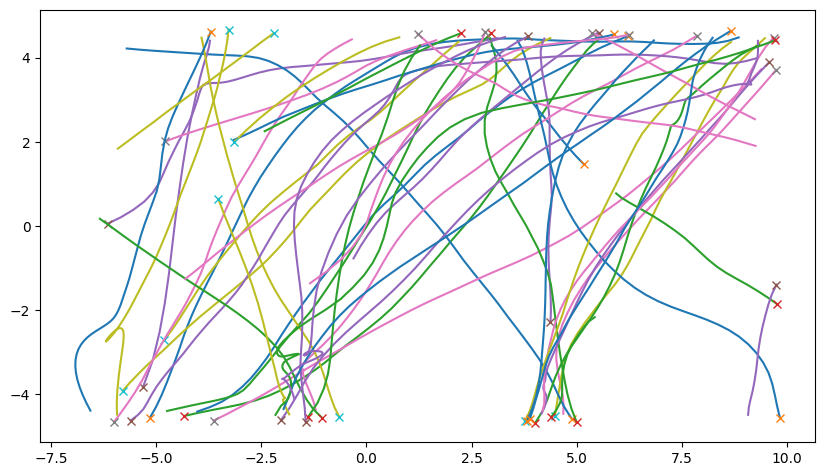

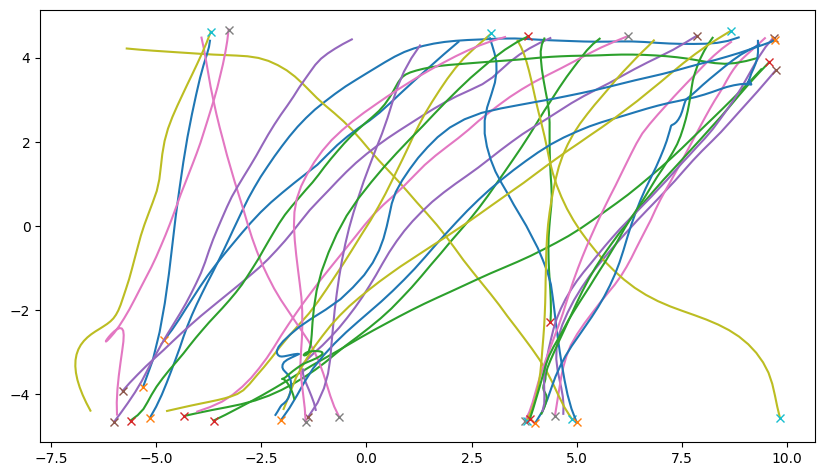

In [20]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY', trackIds=[19019])
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [21]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())

In [22]:
transformer.translateAllToLocalSource(cleanPedDf)

In [23]:
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,235,18001,22,9.0,8.845965,4.485159,1.263405,0.572902,-0.230607,0.419307,1.387231,0.000000,0.000000,0.000000,0.000000
1,18,240,18001,22,9.0,8.590706,4.402693,1.276295,0.412328,-0.064447,0.802866,1.341247,0.255259,0.082466,-0.255259,-0.082466
2,18,245,18001,22,9.0,8.330737,4.355752,1.299848,0.234706,-0.117765,0.888114,1.320867,0.515228,0.129407,-0.515228,-0.129407
3,18,250,18001,22,9.0,8.061950,4.335745,1.343936,0.100036,-0.220440,0.673346,1.347654,0.784016,0.149414,-0.784016,-0.149414
4,18,255,18001,22,9.0,7.781109,4.330627,1.404200,0.025591,-0.301324,0.372225,1.404433,1.064856,0.154532,-1.064856,-0.154532


In [24]:
# trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"]==allPedIds[0]]
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# transformer.rotate(trackDf)
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [25]:
tracksMeta.head()

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,18001,235,570,68,pedestrian,WEST,SOUTH
1,18087,5156,5366,43,pedestrian,WEST,SOUTH
2,18209,14005,14315,63,pedestrian,WEST,SOUTH
3,18365,24194,24359,34,pedestrian,EAST,NORTH
4,19072,4535,4755,45,pedestrian,WEST,SOUTH


In [26]:
# southIds = []
# for pedId in allPedIds:
#     trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
#     trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
#     # print(trackMeta['verticalDirection'])
#     if trackMeta['verticalDirection'] == "SOUTH":
#         southIds.append(pedId)
#         # print(trackMeta["uniqueTrackId"])
#         X, Y = transformer.rotate180(trackDf, xCol=transformer.localXCol, yCol=transformer.localYCol)
#         cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
#         cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y

# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [27]:
# southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
# visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
# visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

# IndTransformer

In [43]:
from ind_tools.IndTransformer import IndTransformer
indTransformer = IndTransformer(colMapper)

[autoreload of tti_dataset_tools.TrajectoryTransformer failed: Traceback (most recent call last):
  File "C:\Users\adhocmaster\anaconda3\envs\tti\lib\site-packages\IPython\extensions\autoreload.py", line 261, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\adhocmaster\anaconda3\envs\tti\lib\site-packages\IPython\extensions\autoreload.py", line 459, in superreload
    module = reload(module)
  File "C:\Users\adhocmaster\anaconda3\envs\tti\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 839, in exec_module
  File "<frozen importlib._bootstrap_external>", line 976, in get_code
  File "<frozen importlib._bootstrap_external>", line 906, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "D:\AV\DataSetExploration\TTI-dataset-tools\src\tti_dataset_tools\TrajectoryTransform

In [40]:
# southIds, newPedDf = indTransformer.convertLocalToNorth(cleanPedDf, tracksMeta)
southIds, newPedDf = indTransformer.convertLocalToNorth(cleanPedDf, None) # rebuilds meta

{'uniqueTrackId': [], 'initialFrame': [], 'finalFrame': [], 'numFrames': [], 'class': [], 'horizontalDirection': [], 'verticalDirection': []}


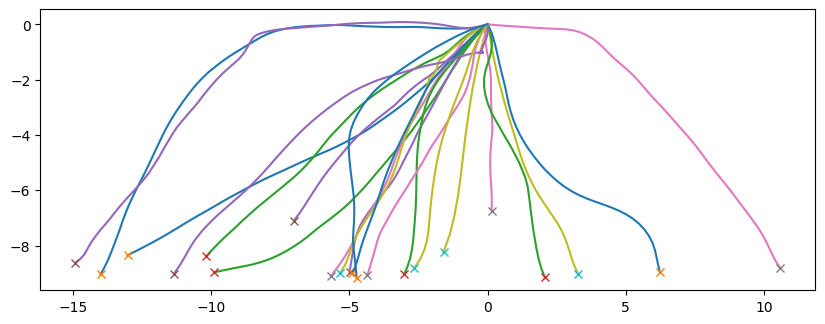

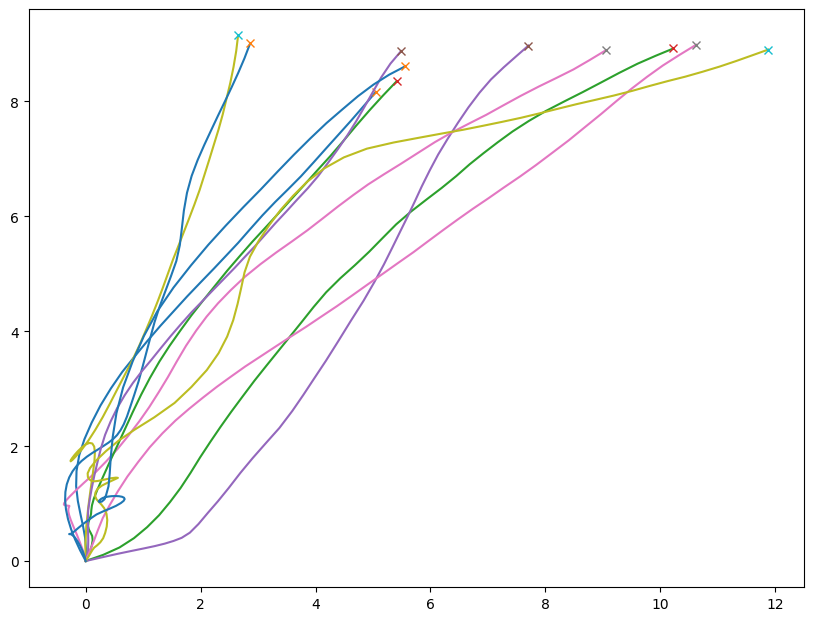

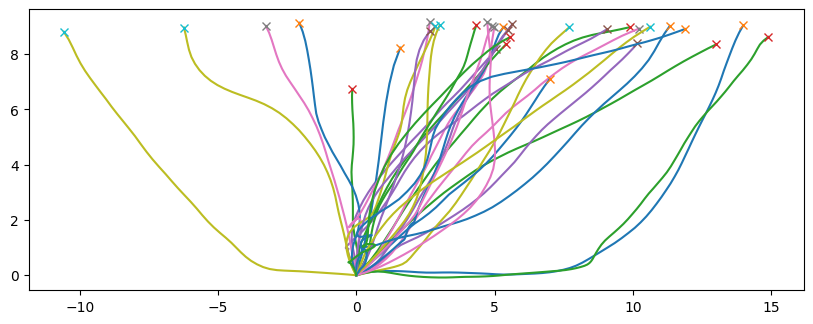

In [41]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
visualizer.show(newPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

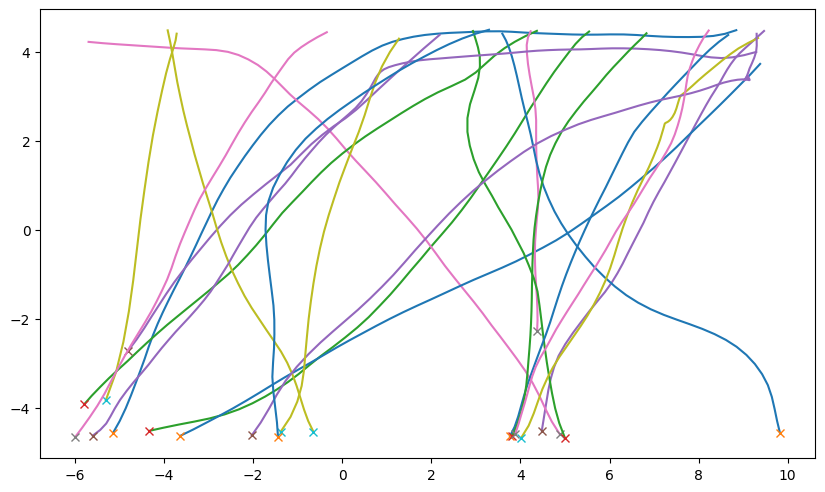

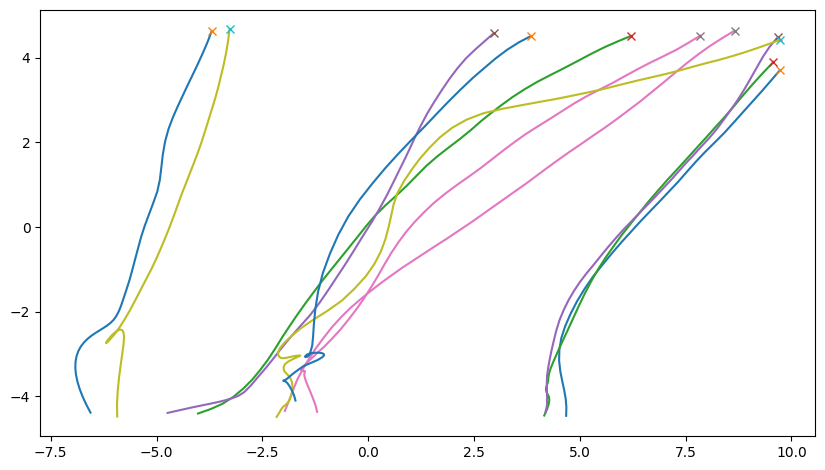

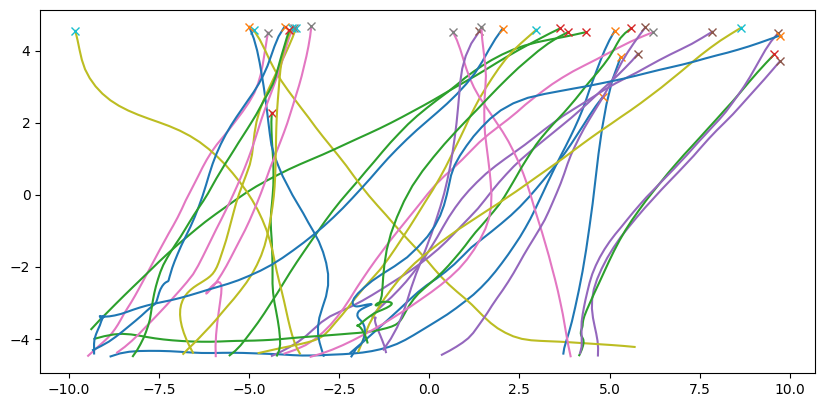

In [42]:
# southIds, newPedDf = indTransformer.convertSceneTracksToNorth(cleanPedDf, tracksMeta)
southIds, newPedDf = indTransformer.convertSceneTracksToNorth(cleanPedDf, None)  # rebuilds meta
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(newPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

# Analyzers

In [ ]:
import seaborn as sns
from tti_dataset_tools.InfluenceAnalyzer import InfluenceAnalyzer
influenceAnz = InfluenceAnalyzer(colMapper)

In [ ]:
dfH = influenceAnz.getInfluenceHeatMap(southPeds, (20,10))

In [ ]:
# plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)

# ax = sns.heatmap(dfH,
#             cmap='icefire',
#             xticklabels=100,
#             yticklabels=10)

# plt.xlabel('X',fontsize=22)
# plt.ylabel('Y',fontsize=22)
# ax.invert_yaxis()

In [ ]:
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

ax = sns.heatmap(dfH,
            cmap='Spectral',
            xticklabels=100,
            yticklabels=10)

plt.xlabel('X',fontsize=22)
plt.ylabel('Y',fontsize=22)
ax.invert_yaxis()

In [ ]:
dfH = influenceAnz.getInfluenceHeatMap(northPeds, (20,10))
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

ax = sns.heatmap(dfH,
            cmap='Spectral',
            xticklabels=100,
            yticklabels=10)

plt.xlabel('X',fontsize=22)
plt.ylabel('Y',fontsize=22)
ax.invert_yaxis()